In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [20]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2021,2,1)
tesla=web.DataReader('TSLA','yahoo',start,end)

In [21]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450


In [22]:
ford=web.DataReader('FORD','yahoo',start,end)
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1.70,1.65,1.69,1.67,16700,1.67
2012-01-04,1.71,1.65,1.68,1.66,5600,1.66
2012-01-05,1.69,1.65,1.65,1.67,9200,1.67
2012-01-06,1.69,1.66,1.68,1.67,9800,1.67
2012-01-09,1.75,1.68,1.72,1.75,34500,1.75


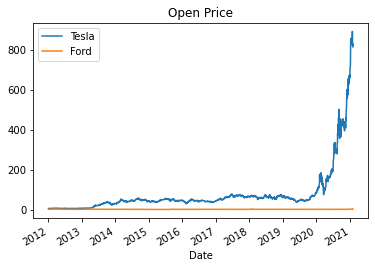

In [23]:
#plot based on opening prices
tesla['Open'].plot(label ='Tesla',title='Open Price')
ford['Open'].plot(label ='Ford')
plt.legend()

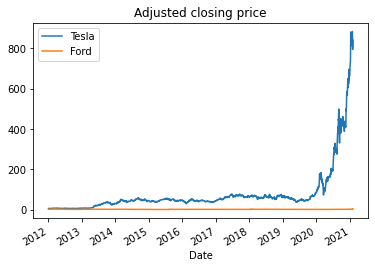

In [24]:
#Plot based on adjusted closing prices
tesla['Adj Close'].plot(label ='Tesla',title='Adjusted closing price')
ford['Adj Close'].plot(label ='Ford')
plt.legend()

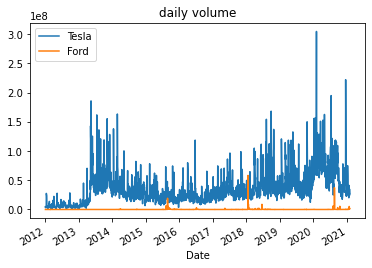

In [25]:
#daily volume
tesla['Volume'].plot(label ='Tesla',title='daily volume')
ford['Volume'].plot(label ='Ford')
plt.legend()

In [26]:
#dates for maximimum trading
tesla['Volume'].idxmax()

Timestamp('2020-02-04 00:00:00')

In [27]:
ford['Volume'].idxmax()

Timestamp('2018-01-19 00:00:00')